# パス解析

## 逐次モデル

逐次モデルは内生変数間の双方向のパスが無いモデル

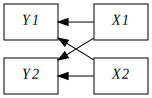

In [29]:
import graphviz

graphviz.Source("""
digraph g {
    graph [rankdir = RL];
    node [shape = rectangle];
        X1 [label=<<I>X<SUB>1</SUB></I>>]
        X2 [label=<<I>X<SUB>2</SUB></I>>]
        Y1 [label=<<I>Y<SUB>1</SUB></I>>]
        Y2 [label=<<I>Y<SUB>2</SUB></I>>]
    edge [];    
        {X1, X2} -> Y1
        {X1, X2} -> Y2
}
""")

semopyはRの`{lavaan}`とは異なり、外生変数間の共変関係や分散を推定してくれない（そのため自由度が上がり適合度系の指標がおかしくなったりする）

なので

```
x1 ~~ x2
x1 ~~ x1
x2 ~~ x2
```

も指定してやる必要がある


In [30]:
import semopy
import numpy as np
import pandas as pd

# データ生成
n = 1000
np.random.seed(0)
x1 = np.random.uniform(size=n)
x2 = np.random.uniform(size=n)
e1 = np.random.normal(size=n)
e2 = np.random.normal(size=n)
y1 = 10 + 3 * x1 + 5 * x2 + e1
y2 = 5 + 10 * x1 + 15 * x2 + e2
data = pd.DataFrame(dict(y1=y1, y2=y2, x1=x1, x2=x2))

# モデルを構築
desc = """
y1 ~ x1 + x2
y2 ~ x1 + x2
x1 ~~ x2
x1 ~~ x1
x2 ~~ x2
"""
model = semopy.Model(desc)
model.fit(data)
model.inspect(std_est=True)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,y1,~,x1,2.925450,0.436100,0.105792,27.652921,0.000000
1,y1,~,x2,4.869091,0.746496,0.102865,47.334923,0.000000
2,y2,~,x1,9.907971,0.528034,0.106670,92.884242,0.000000
3,y2,~,x2,15.085703,0.826853,0.103719,145.448189,0.000000
4,x1,~~,x2,0.000515,0.005930,0.002748,0.187510,0.851261
5,x1,~~,x1,0.084481,1.000000,0.003778,22.360680,0.000000
6,x2,~~,x2,0.089357,1.000000,0.003996,22.360680,0.000000
7,y1,~~,y1,0.945464,0.248700,0.042282,22.360680,0.000000
8,y2,~~,y2,0.961229,0.032317,0.042987,22.360680,0.000000


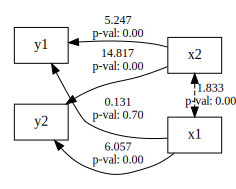

In [26]:
# パス図
g = semopy.semplot(model, filename="/tmp/path_diagram.png", plot_covs=True)

# rank = same
with g.subgraph() as s:
    s.attr(rank = "same")
    s.node("x1")
    s.node("x2")

g.attr(rankdir = "RL")
g.attr(pad = "0.2") # padding
g

### 考察

上記x1,x2は共変関係は考えるが一方向への関係（例えばx2→x1）は考えていない。そのため、もしデータ側にそういう関係があった場合は欠落変数バイアスが発生する様子。